In [264]:
#Importing all required modules here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#suppress display of warnings
import warnings
warnings.filterwarnings('ignore')

#encoding
from sklearn import preprocessing

#normalizing the data
from scipy.stats import zscore

#splitting the data
from sklearn.model_selection import train_test_split

#KNN model
from sklearn.neighbors import KNeighborsClassifier

#metrics of models
from sklearn import metrics

#Classfication Report
from sklearn.metrics import classification_report
from sklearn import model_selection

from sklearn.linear_model import LogisticRegression #LRModel

from sklearn.naive_bayes import GaussianNB #NB model

from sklearn.svm import SVC #SVC model

from sklearn import model_selection #Modelselection

from sklearn.utils import resample#resampling

# ``PART-1``

### `1. Import and warehouse data:`
###### • Import all the given datasets and explore shape and size of each.
###### • Merge all datasets onto one and explore final shape and size.

In [265]:
#Importing each dataset
DataSet1 = pd.read_csv("Part1 - Normal.csv")
DataSet2 = pd.read_csv("Part1 - Type_H.csv")
DataSet3 = pd.read_csv("Part1 - Type_S.csv")

In [266]:
#Merging all datasets
MainDataSet = pd.concat([DataSet1,DataSet2,DataSet3], ignore_index=True)

In [267]:
#Printing & verifying datasets shape
print('DataSet1 shape::',DataSet1.shape)
print('DataSet2 shape::',DataSet2.shape)
print('DataSet3 shape::',DataSet3.shape)
print("=================================")
print('Final DataSet::',MainDataSet.shape)

DataSet1 shape:: (100, 7)
DataSet2 shape:: (60, 7)
DataSet3 shape:: (150, 7)
Final DataSet:: (310, 7)


#### We can see the shape of individual datasets together is equal to MainDataset. 

In [268]:
#No.of Rows * No.of Columns = Size of the Dataframe
print('DataSet1 Size::',DataSet1.size)
print('DataSet2 Size::',DataSet2.size)
print('DataSet3 Size::',DataSet3.size)
print("=================================")
print('Final DataSet::',MainDataSet.size)

DataSet1 Size:: 700
DataSet2 Size:: 420
DataSet3 Size:: 1050
Final DataSet:: 2170


#### We can see that the Size of MainDataset is equals to sum of 3 datasets given.
#### Lets copy our MainDataset before we start making any changes on it

In [269]:
#Copying
Part1_df = MainDataSet.copy()
Part1_df.shape

(310, 7)

#### We have our dataframe ready. Lets explore the content.

In [270]:
#First 5 rows
Part1_df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


### `2. Data cleansing:` 
###### • Explore and if required correct the datatypes of each attribute
###### • Explore for null values in the attributes and if required drop or impute values.


In [271]:
#Five Random rows
Part1_df.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
25,63.929470,19.971097,40.177050,43.958373,113.065939,-11.058179,Nrmal
281,64.624008,15.225303,67.632167,49.398705,90.298468,31.326411,Type_S
161,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
244,60.044177,14.309656,58.038865,45.734521,105.131664,30.409133,Type_S
163,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S


##### We have all numeric columns, except the target variable. (Class)
##### All numbers are in float type & some of them are negative too.

In [272]:
Part1_df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

##### All numeric attributes ( feature variables )  are FLOAT and target variable is OBJECT.
##### No correction in datatypes required.

In [1]:
#Null values
Part1_df.isnull().sum()

NameError: name 'Part1_df' is not defined

#### There are no null values in the dataset. So no imputation required.

In [274]:
#More info
Part1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


- No.of non-null rows for each columns are same. Float - 6, object-1 type.
- 17.kb file, so overall data is too less for ML model.

In [275]:
#Explore the class variable unique data counts
Part1_df['Class'].value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

##### From 3 dataset files, we seem to have 6 unique values.
##### Is Type_S & tp_s both same? Nrmal/Normal same? Type_H/type_h same?
##### Lets verify if those come from same dataset & change if so.

In [276]:
#Verify Class values count in each dataset file.
DataSet1['Class'].value_counts(),DataSet2['Class'].value_counts(),DataSet3['Class'].value_counts()

(Normal    73
 Nrmal     27
 Name: Class, dtype: int64,
 Type_H    37
 type_h    23
 Name: Class, dtype: int64,
 Type_S    133
 tp_s       17
 Name: Class, dtype: int64)

##### From the name of the CSV file given, we can safely assume that there is slight rectification needed in the given class values, So we can correct those Class values.

In [277]:
Part1_df['Class'] = Part1_df['Class'].replace(['Nrmal'],'Normal')
Part1_df['Class'] = Part1_df['Class'].replace(['type_h'],'Type_H')
Part1_df['Class'] = Part1_df['Class'].replace(['tp_s'],'Type_S')
Part1_df['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

##### Type_S  seems to be 50% in our data and Normal is around 35%, Type_H is 15% (approx.)

In [278]:
#Verifying if all the values in columns are numeric or not.
#If any special characters exists
Part1_df.iloc[:,1:6].apply(lambda col: pd.to_numeric(col, errors='coerce').notnull().all())

P_tilt      True
L_angle     True
S_slope     True
P_radius    True
S_Degree    True
dtype: bool

###### Except target variable Class, every other attribute is numeric & we can proceed further. 

##### Encoding the Class values

In [279]:
Part1_df.groupby(['Class']).count()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
Normal,100,100,100,100,100,100
Type_H,60,60,60,60,60,60
Type_S,150,150,150,150,150,150


In [280]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
Part1_df['Class']=le.fit_transform(Part1_df['Class'])
Part1_df['Class'].value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

- Class Types:
##### Normal - 0
##### Type_H - 1
##### Type_S - 2

### `3. Data analysis & visualisation:`
###### • Perform detailed statistical analysis on the data.
###### • Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.


In [281]:
Part1_df.iloc[:,1:6].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


##### Except S_Degree, all other attributes has mean almost near to avg (50% ) values
##### Huge difference between mean, max values of S_Degree. So it has outliers. 
##### Infact, for all there is significant difference between 75% & Max values, so outliers are there. 
##### P_tilt has negative value as min. Possibility of negative numbers in the data.

In [282]:
#Lets verify the skew level
Part1_df.iloc[:,1:6].skew()

P_tilt      0.676553
L_angle     0.599451
S_slope     0.792577
P_radius   -0.176835
S_Degree    4.317954
dtype: float64

###### S_Degree is highly skewed (Positive). So right skewed. 
######  First 4 columns also slightly positive skewed.
######  P_radius is only one, has negative (left) skewed here. 

<AxesSubplot:>

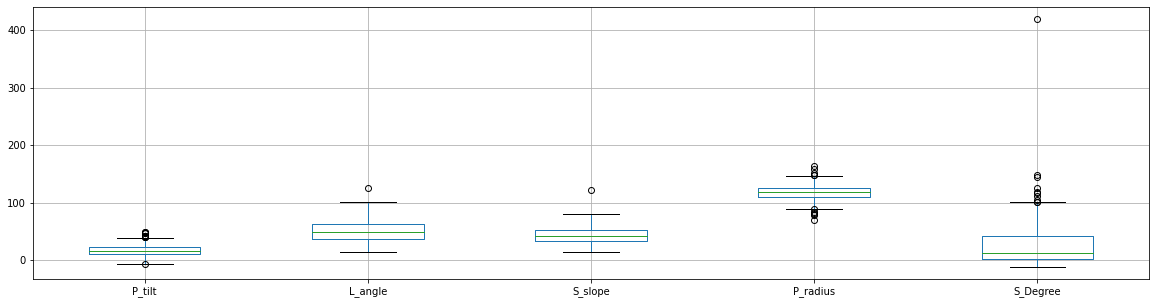

In [283]:
#boxplot
plt.figure(figsize=(20,5))
Part1_df.iloc[:,1:6].boxplot()

##### 1. No.of outliers are  very few, except for S_Degree. 
##### 2. Except S_degree, for all, median of the box seems to be near the centre of the box.
##### 3. All has outliers & S_degree has one outlier from way above the whiskers.
##### 4. P_radius has outliers on both sides.
##### 5. P_tilt has one outlier at the bottom side.

2    150
0    100
1     60
Name: Class, dtype: int64


<AxesSubplot:ylabel='Class'>

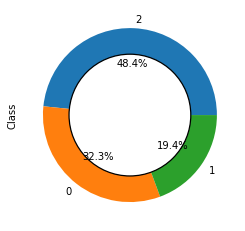

In [284]:
#Frequency distributions of the CLASS
print(Part1_df['Class'].value_counts())
fig, ax = plt.subplots()
fig = plt.gcf()
centre_circle = plt.Circle((0,0),0.7,color='black', fc='white',linewidth=1.25)
fig.gca().add_artist(centre_circle)
Part1_df['Class'].value_counts().plot(ax=ax, kind='pie',autopct='%1.1f%%')

<AxesSubplot:xlabel='Class', ylabel='count'>

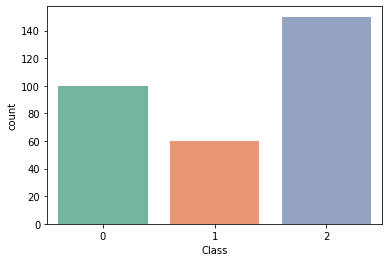

In [285]:
#Plot the Class variable to verify counts.
sns.countplot(Part1_df['Class'],palette="Set2")

<AxesSubplot:xlabel='Class', ylabel='S_Degree'>

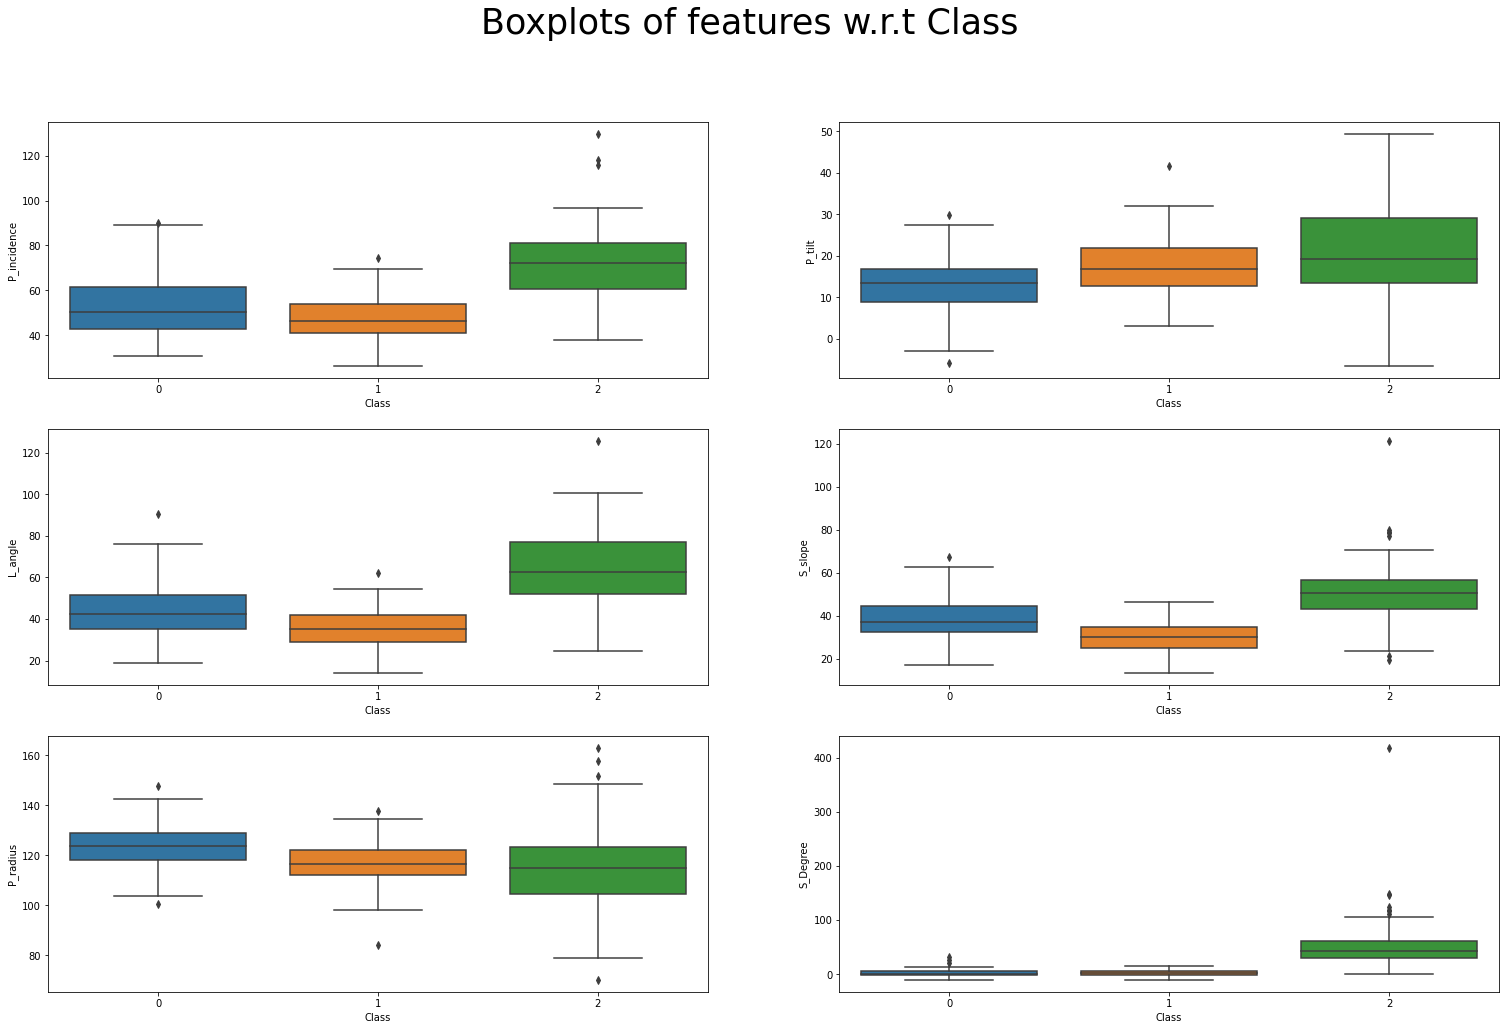

In [286]:
#Bivariate analysis
#visualizing the features wth respect to Class
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(26,16))
fig.suptitle('Boxplots of features w.r.t Class', size=35)
sns.boxplot(x="Class", y="P_incidence", data=Part1_df, ax=axes[0,0])
sns.boxplot(x="Class", y="P_tilt", data=Part1_df, ax=axes[0,1])
sns.boxplot(x="Class", y="L_angle", data=Part1_df, ax=axes[1,0])
sns.boxplot(x="Class", y="S_slope", data=Part1_df, ax=axes[1,1])
sns.boxplot(x="Class", y="P_radius", data=Part1_df, ax=axes[2,0])
sns.boxplot(x="Class", y="S_Degree", data=Part1_df, ax=axes[2,1])

<AxesSubplot:xlabel='Class', ylabel='P_incidence'>

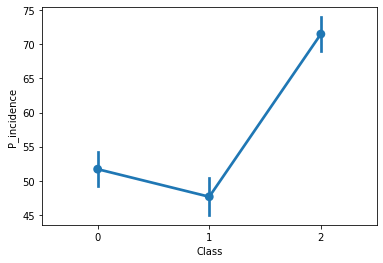

In [287]:
#Bivariate analysis
#Class distribution vs P_incidence
sns.pointplot(x='Class', y='P_incidence', data= Part1_df)

- Types_S class is more in P_incidence observations

<AxesSubplot:xlabel='Class', ylabel='P_tilt'>

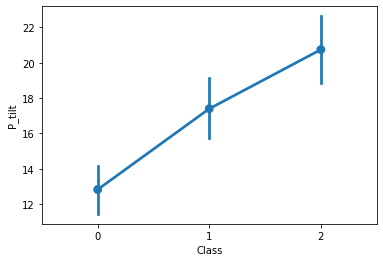

In [288]:
#Class distribution vs P_tilt
sns.pointplot(x='Class', y='P_tilt', data= Part1_df)

- Types_S class is more in P_tilt observations & Type_H also very significant count.

<AxesSubplot:xlabel='Class', ylabel='L_angle'>

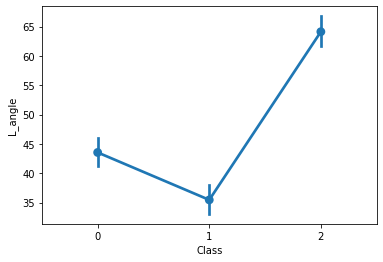

In [289]:
#Class distribution vs L_angle
sns.pointplot(x='Class', y='L_angle', data= Part1_df)

- Type_H is lower than Normal here.

<AxesSubplot:xlabel='Class', ylabel='S_slope'>

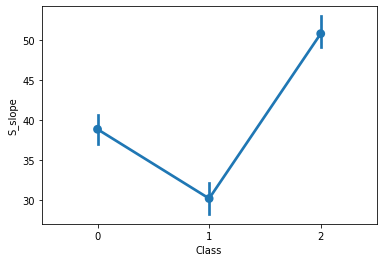

In [290]:
#Class distribution vs S_slope
sns.pointplot(x='Class', y='S_slope', data= Part1_df)

- Type_H is lower then Normal
- Types_S is high 
- Same like L_angle 

<AxesSubplot:xlabel='Class', ylabel='P_radius'>

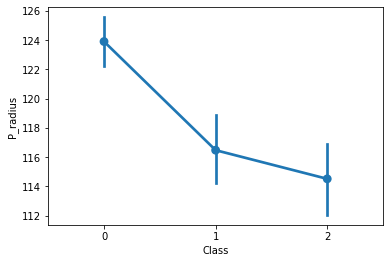

In [291]:
#Class distribution vs P_radius
sns.pointplot(x='Class', y='P_radius', data= Part1_df)

- Normal is high ; only column with less Type_S data.

<AxesSubplot:xlabel='Class', ylabel='S_Degree'>

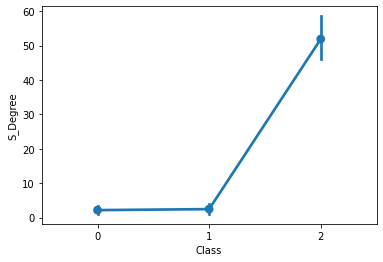

In [292]:
#Class distribution vs S_Degree
sns.pointplot(x='Class', y='S_Degree', data= Part1_df)

- Normal & Type_H is too low compared to Types_S

## Overall Conclusions from above pointplots vs CLASS

##### 1. P_incidence, S_degree has similar relationship vs CLASS
##### 2. S_slope, L_angle has similar relationship vs CLASS
##### 3. P_radius, P_tilt has opposite relationship vs CLASS
##### 4. Mostly Type_S has higher counts vs 5 attributes, except P_radius. 
##### 5. P_radius has high Normal class.

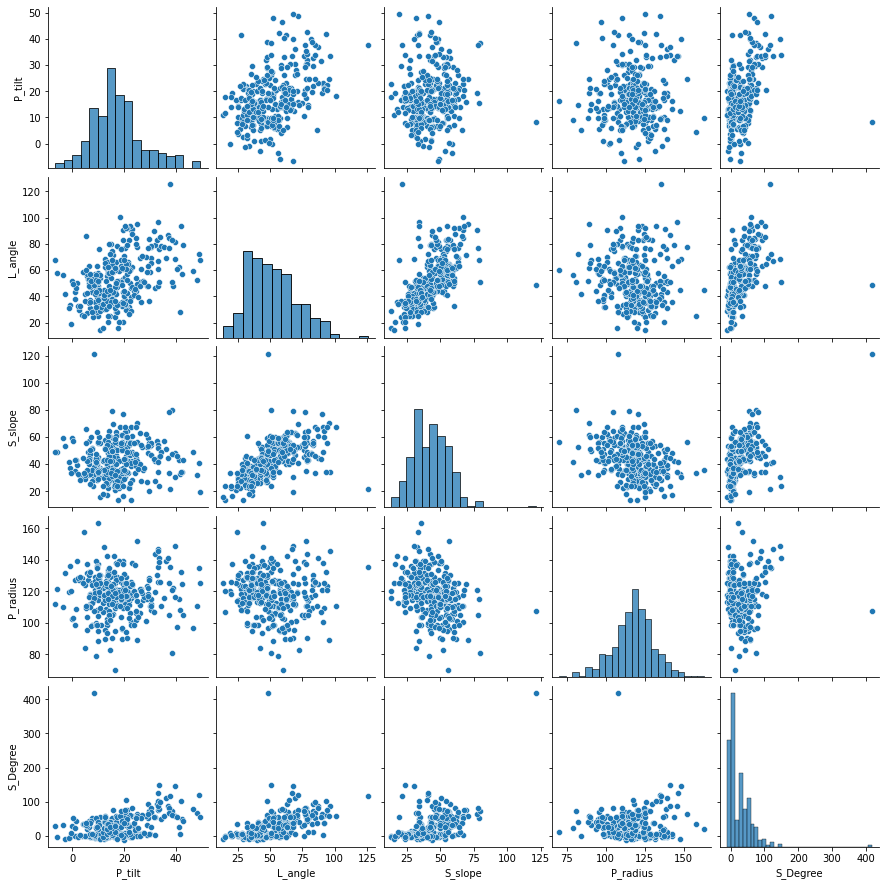

In [293]:
#Multivariate analysis
sns.pairplot(Part1_df, vars=Part1_df.columns[1:6])

#### 1. From daignal grpahs, we can see that S_Degree is Right skewed,  others are seems moderately follows normal distribution.
#### 2. S_degree stays lower even with higher values of other attributes.
#### 3. S_Slope & L_angle seems to be linear.(positive)
#### 4. L_angle, P_radius data has inconclusive relationship.
#### 5. P_tilt  & L_angle seems to be linear too.(postive)

In [294]:
#Correlation
Part1_df.iloc[:,1:6].corr()

,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_tilt,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.397862,0.533667,0.523557,-0.026065,1.000000


<AxesSubplot:>

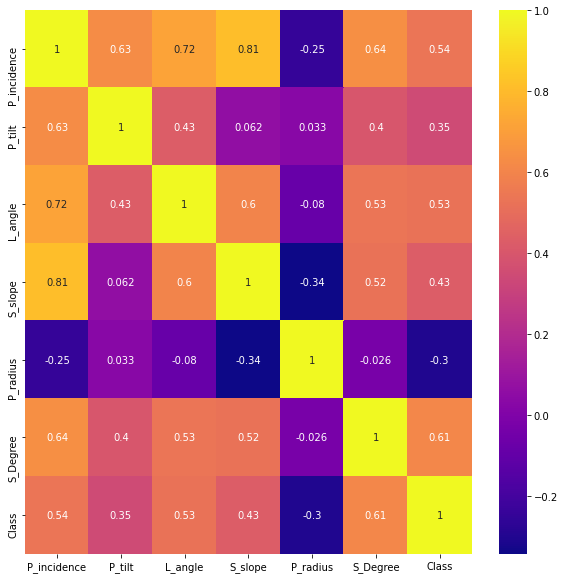

In [295]:
#Plotting heatmap
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(Part1_df.corr(),ax=ax,annot=True,cmap="plasma")

##### Proper blue between P_radius vs other attributes. (lower correlations)
##### Apart from P_radius, P_tilt vs S_slpoe has lower correlation. 
##### S_degree & P_incidence has high correlation (0.81)
##### P_radius has negative correlation with others, except with P_tilt.
#####  Class has postive relationship with S_degree, P_incidence & low with P_radius

# `Hypothesis Analysis`

#### We have target variable(dependent) & the feature variables(independt). So it is evident that Class is depent/has an effect by dependent variables. Also clear assumption is that all attributes are independt from each other.

##### H0: We can assume Class type doesn't have any significance on the feature variable data.

##### But we clearly know that the CLASS is predicted based on the values of each attributes. So there would be significance effect on class outcome because of attribute values & vice-versa.

##### Hence hypothesis test results are very obvious. H0 can be rejected.

### `4. Data pre-processing:`
##### • Segregate predictors vs target attributes
##### • Perform normalisation or scaling if required.
##### • Check for target balancing. Add your comments.
##### • Perform train-test split.


## `Outliers`

#### As we know outliers will never be nearest neighbours of any. And we have only few anyways.
#### So lets ignore the outliers for now. At the end, we will impute with mean values & build another model for comparing.

In [296]:
#independent attributes
X = Part1_df.drop(labels= "Class" , axis = 1)
#target variable
y = Part1_df["Class"]
X.sample(3)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
275,56.563824,8.961262,52.577846,47.602562,98.777115,50.701873
171,86.900794,32.928168,47.794347,53.972627,135.075364,101.719092
117,31.276012,3.144669,32.562996,28.131342,129.011418,3.623020


In [66]:
y.sample(3)

279    2
89     0
91     0
Name: Class, dtype: int32

In [297]:
#Since we have numeric values & we are not sure of the measurements. So we need to normalize.
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 
XScaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,-1.375244e-16,1.001617,-1.996010,-0.817398,-0.104925,0.719464,4.029206
P_tilt,310.0,2.292073e-16,1.001617,-2.411664,-0.688114,-0.118606,0.458116,3.191402
L_angle,310.0,1.833659e-16,1.001617,-2.047652,-0.806027,-0.127862,0.597549,3.984615
S_slope,310.0,-1.833659e-16,1.001617,-2.207741,-0.716842,-0.040960,0.726941,5.855771
P_radius,310.0,-6.876220e-16,1.001617,-3.597963,-0.542383,0.026138,0.567621,3.395818
S_Degree,310.0,-4.584147e-17,1.001617,-0.996172,-0.658507,-0.387450,0.399768,10.460350


 - Std deviation is close to 1 unit after normalization for all features.

## Check for target balancing. Add your comments 


- We have seen in previous Donut chart that it is imbalanced. 

#### Type_s is 48.4%
#### Normal 32.3%
#### Type_H is 19.4%

- Given data itself is very limited (just 310 observations)
- Out of Type_S seems to be half nearly, so prediction slightly favours it.


In [298]:
# Split X and y into training and test set
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

In [299]:
#Verifying the split data
print("{0:0.2f}% data is in training set".format((len(X_train)/len(XScaled.index)) * 100))
print("{0:0.2f}% data is in testing set".format((len(X_test)/len(XScaled.index)) * 100))

70.00% data is in training set
30.00% data is in testing set


### `5. Model training, testing and tuning:`
##### • Design and train a KNN classifier.
##### • Display the classification accuracies for train and test data.
##### • Display and explain the classification report in detail.
##### • Automate the task of finding best values of K for KNN.
##### • Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model.


In [300]:
#Lets take k=5 (should be odd, so that similarities won't be even)
NNH = KNeighborsClassifier(n_neighbors= 5 , metric  = 'euclidean' )

In [301]:
# Call Nearest Neighbour algorithm
NNH.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [302]:
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)

In [303]:
print('Accuracy on Training data:',NNH.score(X_train, y_train) )
print('Accuracy on Test data:',NNH.score(X_test, y_test) )

Accuracy on Training data: 0.8571428571428571
Accuracy on Test data: 0.7419354838709677


##### On the training data : 85%
##### On the testing data: 74%

- Model does slightly better on training & not on testing data, so overfitting.

- This is not the perfect accuracy, but overall good model considering the DataSet Size given (which is less).

<AxesSubplot:>

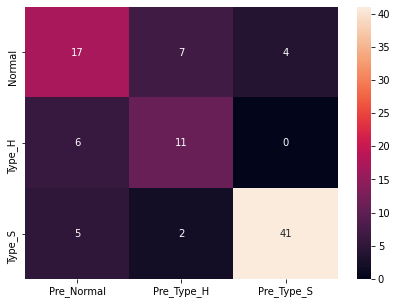

In [304]:
cm = metrics.confusion_matrix(y_test, predicted_labels, labels=[0, 1,2])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_H","Type_S"]],
                  columns = [i for i in ["Pre_Normal","Pre_Type_H","Pre_Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Correctly Predicted
Normal - 17 ;
Type_H - 11 ;
Type_S - 41 ;
### Incorrect Predicted
Normal - 7+4 = 11 ;
Type_H - 6+0 = 6 ;
Type_S - 5+2 = 7 ;

#### Only Type_S has correct classifications far better. (41/48; missclassified- 7/48)
#### Type_H (6/18) & Normal (11/28) mis-classified.

In [305]:
#Lets see the Classfication Report
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61        28
           1       0.55      0.65      0.59        17
           2       0.91      0.85      0.88        48

    accuracy                           0.74        93
   macro avg       0.69      0.70      0.69        93
weighted avg       0.75      0.74      0.75        93



#### (Normal-0 ; Type_H - 1; Type_S - 2)

#### `Clearly the model is biased towards Class2 (Type-S)`

###### Precision = TP/(TP + FP) (Correct prediction rate)
- Type_S is predicted far better

######  Recall = TP/(TP+FN)
- Type_S is better 
- Not much difference between H & normal, though Normal datasize is double(almost) H.

######  F1 Score = 2*(Recall * Precision) / (Recall + Precision)
- Type_S does better (88%)

######  Support = no.of actual occurrences of the class in the dataset.
- Samething can be seen in Confusion Matrix as well.


In [306]:
##Automating the k values in range(1,50)
# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [307]:
# empty list that will hold accuracy scores
ac_scores = []
k_values = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    NNH = KNeighborsClassifier(n_neighbors= k , metric  = 'euclidean' )
    NNH.fit(X_train, y_train)
    # predict the response
    y_pred = NNH.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)
    k_values.append(k)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


 - If K=1, then it becomes overfitting
 - Since our target variable is Class ,so k=1 also acceptable.
 - Lets see if we have same score with any other different number

In [308]:
df = pd.DataFrame()
df['K_value']= k_values
df['Accuracy'] = ac_scores
df.sort_values(by=['Accuracy'], ascending=False).head(10)

,K_value,Accuracy
0,1,0.795699
8,17,0.795699
22,45,0.795699
21,43,0.795699
19,39,0.795699
15,31,0.795699
14,29,0.795699
10,21,0.795699
12,25,0.795699
7,15,0.784946


##### As we can see we have 9 values with high Accuracy rate
##### 1,17,45,43,39,31,29,21,25

In [309]:
##Lets compare with Other Models
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=13)
GN_model=GaussianNB()
svc_model_linear = SVC(kernel='linear',C=1,gamma=.6)
svc_model_rbf = SVC(kernel='rbf',degree=2,C=.009)
svc_model_poly  = SVC(kernel='poly',degree=2,gamma=0.1,C=.01)

LR: 0.854839 (0.076677)
KNN: 0.809677 (0.078288)
NB: 0.822581 (0.076677)
SVM-linear: 0.848387 (0.066188)
SVM-poly: 0.832258 (0.060864)
SVM-rbf: 0.483871 (0.069186)


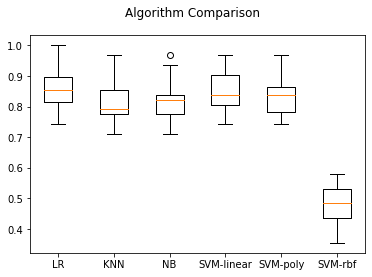

In [310]:
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear', svc_model_linear))
models.append(('SVM-poly', svc_model_poly))
models.append(('SVM-rbf', svc_model_rbf))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=1,shuffle=True)
    cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### SVM model (Radial basis Function method) & NB model isn't good fit for this dataset.
#### Logistic Regression & KNN is slightly better than rest of them with outliers.
#### Due to less size of given dataset, no model seems to be best. All would be baised towards Type_S.

## `Replacing all outliers with their mean values`

In [311]:
import math
#copying the Part1_df to Part11_df to work on outliers.
Part11_df = Part1_df.copy()
#Get the lower fence from the box plot.
cols = Part11_df[Part11_df.columns.difference(['Class'])].columns
for c in cols :
    #print(Part1_df[c])
    Q1 = Part11_df[c].quantile(0.25)
    Q2 = Part11_df[c].quantile(0.50)
    Q3 = Part11_df[c].quantile(0.75)
    meanc = Part11_df[c].mean()
    print("Mean of ", c ,"is:", meanc.round(decimals=2))
    IQR = Q3-Q1
    Lower_Fence = (Q1 - (1.5 * IQR)).round(decimals=4)
    print("Lower fence of", c, "is :", Lower_Fence)
    lrow_nos = np.where(Part11_df[c] < Lower_Fence)
    Part11_df.loc[(Part11_df[c] < Lower_Fence),c] = meanc
    
    #Check number of outliers greater than upper fence.
    Upper_Fence = (Q3 + (1.5 * IQR)).round(decimals=4)
    print("Upper fence of ", c ,"is :", Upper_Fence)
    urow_nos = np.where(Part11_df[c] > Upper_Fence)
    
    Part11_df.loc[(Part11_df[c] > Upper_Fence),c] = meanc

Mean of  L_angle is: 51.93
Lower fence of L_angle is : -2.0
Upper fence of  L_angle is : 102.0
Mean of  P_incidence is: 60.5
Lower fence of P_incidence is : 6.7592
Upper fence of  P_incidence is : 112.5488
Mean of  P_radius is: 117.92
Lower fence of P_radius is : 88.5715
Upper fence of  P_radius is : 147.6054
Mean of  P_tilt is: 17.54
Lower fence of P_tilt is : -6.5129
Upper fence of  P_tilt is : 39.3004
Mean of  S_Degree is: 26.3
Lower fence of S_Degree is : -57.9217
Upper fence of  S_Degree is : 100.8128
Mean of  S_slope is: 42.95
Lower fence of S_slope is : 4.324
Upper fence of  S_slope is : 81.719


<AxesSubplot:>

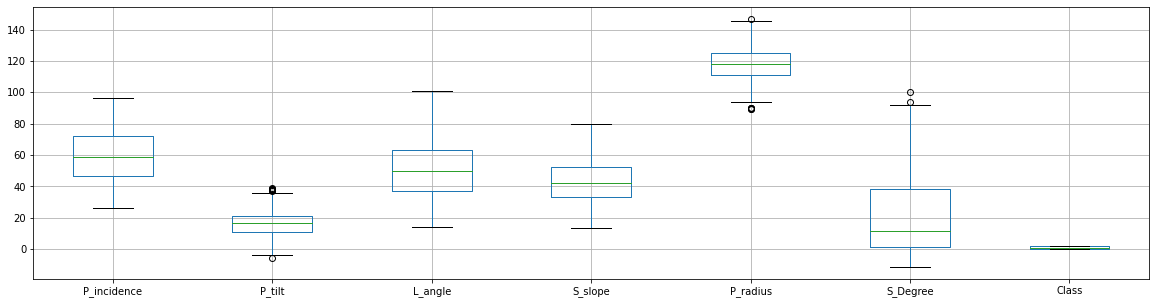

In [312]:
plt.figure(figsize=(20,5))
Part11_df.boxplot()

In [313]:
#independent attributes
X1 = Part11_df.drop(labels= "Class" , axis = 1)
#target variable
y1 = Part11_df["Class"]

#Since we have numeric values & we are not sure of the measurements. So we need to normalize.
XScaled1  = X1.apply(zscore)  # convert all attributes to Z scale 
# Split X and y into training and test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(XScaled1, y1, test_size=0.30, random_state=1)

#Lets take k=5 (should be odd, so that similarities won't be even)
NNH1 = KNeighborsClassifier(n_neighbors= 5 , metric  = 'euclidean' )
# Call Nearest Neighbour algorithm
NNH1.fit(X_train1, y_train1)
NNH1.fit(X_train1, y_train1)
predicted_labels = NNH1.predict(X_test1)
print('Accuracy on Training data:',NNH1.score(X_train1, y_train1) )
print('Accuracy on Test data:',NNH1.score(X_test1, y_test1) )

Accuracy on Training data: 0.8755760368663594
Accuracy on Test data: 0.7741935483870968


#### Acuuracy is slightly improved 87.5% from 85.7% 
#### on training data and 77.4% from 74.2% on testing data.

### `6. Conclusion and improvisation:`
##### • Write your conclusion on the results.
##### • Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the research team to perform a better data analysis in future.


## `Conclusion`

- Dataset is too less & has Type_S class more. So model is slightly baised towards Type_S
- Type_S is predicted better comparing the other 2. 
- Normal class is more misclassified than other 2.
- Type_S has better Precision, Recall, F1-Score
- There isn't much improvement on accuracy scores after normalization.
- Dataset has few outliers only, all nearby whiskers.
- P-radius has opposite relationship with most of all other features.
- All of them has Class_S higher. (except P_radius)
- P_radius is only one having more high Normal class.
- P_tilt contributes much to Class- H

## `Improvisation`

- Dataset Size is less, has just 310 rows, with 3 types of Class.
- Quantity is poor but quality is good.
- ML model can't be best on such less data size.
- Data has no null values, which is good.
- Individual datasets class variable is incorrectly captured like Type_S, ty_s
- No correction in dataypes needed, which is good.
- Data seems to be captured internally & since its body bio-mechanics. It would take lot of time to recapture the same data.
- Data is highly trustworthy for the same as above reason.
- Data has good variety as well in Target class.
- Most of the features contributes to Class S, due to high in number.

# `PART-2`

### `1. Import and warehouse data:`
##### • Import all the given datasets and explore shape and size of each.
##### • Merge all datasets onto one and explore final shape and size.


In [314]:
#Importing all datasets
Part2_Dataset1 = pd.read_csv("Part2 - Data1.csv")
Part2_Dataset2 = pd.read_csv("Part2 -Data2.csv")

In [315]:
#randome sample
Part2_Dataset1.sample(3)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
4069,4070,56,32,31,94596,4,1.3,1
118,119,41,16,73,92647,3,3.0,1
1338,1339,51,27,42,90245,4,0.1,3


In [316]:
#random sample
Part2_Dataset2.sample(3)

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
2446,2447,218,0,0,1,0,0.0
588,589,0,0,1,1,1,0.0
1837,1838,180,0,0,1,1,0.0


- As we can see that columns in dataset1 are different from dataset2 except the 'ID'

In [317]:
#Shape of each
print("The shape of Dataset1:", Part2_Dataset1.shape)
print("The shape of Dataset2:", Part2_Dataset2.shape)
print("==================================")
#Size of each
print("The size of Dataset1:", Part2_Dataset1.size)
print("The size of Dataset2:", Part2_Dataset2.size)

The shape of Dataset1: (5000, 8)
The shape of Dataset2: (5000, 7)
The size of Dataset1: 40000
The size of Dataset2: 35000


##### Dataset1 has 8 coulmns & where as Dataset2 has only 7.
##### 'ID' is common column & remaning all different columns(data)
##### Both has 5000 rows. So post merge, maindataset will have 5000 rows.

In [318]:
#Merging all datasets
Part2MainDataSet = pd.merge(Part2_Dataset1,Part2_Dataset2,  on='ID')
#Shape of Maindataset
print("The shape of Main Dataset:", Part2MainDataSet.shape)
#Size of Maindataset
print("The size of Main Dataset:", Part2MainDataSet.size)

The shape of Main Dataset: (5000, 14)
The size of Main Dataset: 70000


In [319]:
#Verify the columns list once
Part2_Dataset1.columns, Part2_Dataset2.columns,Part2MainDataSet.columns

(Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
        'MonthlyAverageSpend', 'Level'],
       dtype='object'),
 Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
        'CreditCard', 'LoanOnCard'],
       dtype='object'),
 Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
        'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
        'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
       dtype='object'))

#### Lets verify if the merge happened properly

#### Lets read a specific row from each & main dataset

In [320]:
#Dataset1 where ID=9
Part2_Dataset1[Part2_Dataset1['ID'] == 9]

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
8,9,35,10,81,90089,3,0.6,2


In [321]:
#Dataset2 where ID = 9
Part2_Dataset2[Part2_Dataset2['ID'] == 9]

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
8,9,104,0,0,1,0,NaN


In [322]:
#Dataset MAIN where ID=9
Part2MainDataSet[Part2MainDataSet['ID'] == 9]

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
8,9,35,10,81,90089,3,0.6,2,104,0,0,1,0,NaN


#### We can see that merge properly added 2 dataframes on given column=ID

### `2. Data cleansing:`
##### • Explore and if required correct the datatypes of each attribute
##### • Explore for null values in the attributes and if required drop or impute values.


In [323]:
#Lets copy the whole dataset
Part2_df = Part2MainDataSet.copy()

In [324]:
#Datatypes
Part2_df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

##### We have all numerical datatypes
##### Lets verify the type of the data, that its holding.

In [325]:
#Info
Part2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


- LoanOnCard has 4980 non-null rows where as all have 5000.
- MonthlyAverageSpend  & LoanOnCard are only float & remaning all int
- Files size is ~ 586KB, which is good in size in realtime data.

In [326]:
#Lets see if any null values
Part2_df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

#### LoanOnCard has 20 null values. Lets drop those 20 rows, as we have 4980 remaning, which is good anyway.

### `Alternate way of filling those NULL values`

If high null values are exists in class variable, We can use KNN classifer to know the nearest neighbours of those missing LoanOnCard values & fill them. That way we don't need to drop any data.

Since the null values are too less, I am just dropping them here.


In [327]:
#Type of data in LoanOncard
Part2_df['LoanOnCard'].value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

In [328]:
#Dropping all the rows with null values(20 only), since we have good no.of non-null rows
Part2_df=Part2_df.dropna()
Part2_df.shape

(4980, 14)

##### It is catagorical & can replace 0.0 with 0, 1.0 with 1 & type as int.

In [329]:
Part2_df['LoanOnCard'] = Part2_df['LoanOnCard'].replace(0.0,0)
Part2_df['LoanOnCard'] = Part2_df['LoanOnCard'].replace(1.0,1)
Part2_df['LoanOnCard'] = Part2_df['LoanOnCard'].astype('int')
Part2_df['LoanOnCard'].value_counts()

0    4500
1     480
Name: LoanOnCard, dtype: int64

In [330]:
#Re-verify the null rows
Part2_df['LoanOnCard'].isnull().sum()

0

- 20 rows are dropped. Since we have bigger dataset, so no issues.

In [331]:
#If there is any duplicated
Part2_df.duplicated().any()

False

- No duplicate data

### `3. Data analysis & visualisation:`
##### • Perform detailed statistical analysis on the data.
##### • Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.


In [332]:
Part2_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,4980.0,2510.345382,1438.011129,10.0,1265.75,2510.5,3755.250,5000.0
Age,4980.0,45.352610,11.464212,23.0,35.00,45.0,55.000,67.0
CustomerSince,4980.0,20.117671,11.468716,-3.0,10.00,20.0,30.000,43.0
HighestSpend,4980.0,73.852410,46.070090,8.0,39.00,64.0,98.000,224.0
ZipCode,4980.0,93152.420482,2123.660073,9307.0,91911.00,93407.0,94608.000,96651.0
HiddenScore,4980.0,2.395582,1.147200,1.0,1.00,2.0,3.000,4.0
MonthlyAverageSpend,4980.0,1.939536,1.750006,0.0,0.70,1.5,2.525,10.0
Level,4980.0,1.880924,0.840144,1.0,1.00,2.0,3.000,3.0
Mortgage,4980.0,56.589759,101.836758,0.0,0.00,0.0,101.000,635.0
Security,4980.0,0.104418,0.305832,0.0,0.00,0.0,0.000,1.0


##### 1. Age varies between 23 to 67. Avg 45.
##### 2. CustomerSince: Customer of the bank since. [unit is masked]. CustomerSince would be a +ve or 0(if recently became customer) given any unit. It has min value is -3. We will have to make it 0.
##### 3. HighestSpend: on one single transaction. min 8, max 224, avg 64. Must have few outliers there.
##### 4. ZipCode has nothing to do with anything.
##### 5. HiddenScore seems a catogorical variable, varies between 0 to 4
##### 6. MonthlyAverageSpend varies between 0.0 to 10. 
##### 7. Level seems to be a catogorical variable varies between 0 to 3
##### 8. Mortgage mean is too low compare to Max, so has outliers.
##### 9. Security seems to be a catogorical variable varies between 0 to 1
##### 10. FixedDepositAccount seems to be a catogorical variable varies between 0 to 1
##### 11. InternetBanking seems to be a catogorical variable varies between 0 to 1
##### 12. CreditCard seems to be a catogorical variable varies between 0 to 1

In [333]:
#Unique observations count
Part2_df.nunique()

ID                     4980
Age                      45
CustomerSince            47
HighestSpend            162
ZipCode                 467
HiddenScore               4
MonthlyAverageSpend     108
Level                     3
Mortgage                347
Security                  2
FixedDepositAccount       2
InternetBanking           2
CreditCard                2
LoanOnCard                2
dtype: int64

##### Last 5 columns plus Level, HiddenScore are catagorical variables.
##### Lets keep all numerical variables first & keep all catagorical variables last

In [334]:
#We can drop ID, ZipCode (2 columns)
#Re-arrange numerical values first; then catogorical columns next.
#Would be easier to split the dataframe based on columns no's
Part2_df = Part2_df.reindex(columns=['Age', 'CustomerSince', 'HighestSpend','MonthlyAverageSpend', 'Mortgage',
                                       'Level','HiddenScore','Security','FixedDepositAccount', 
                                       'InternetBanking', 'CreditCard', 'LoanOnCard'])
Part2_df.shape
#rows unchanged

(4980, 12)

#### CustomerSince can't be negative. nevertheless the unit(days/weeks/months/years). Replacing all negative values to 0.

In [335]:
Part2_df.loc[(Part2_df['CustomerSince'] < 0),'CustomerSince'] = 0

In [336]:
#Lets start with Correlations
Part2_df.corr()

,Age,CustomerSince,HighestSpend,MonthlyAverageSpend,Mortgage,Level,HiddenScore,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
Age,1.000000,0.994190,-0.054951,-0.051896,-0.013272,0.042750,-0.045289,0.000323,0.007744,0.011227,0.007344,-0.008147
CustomerSince,0.994190,1.000000,-0.046262,-0.049756,-0.011632,0.014910,-0.051124,-0.000340,0.009779,0.011447,0.008693,-0.008244
HighestSpend,-0.054951,-0.046262,1.000000,0.646109,0.207236,-0.188909,-0.158357,-0.002284,0.169535,0.014202,-0.002780,0.502626
MonthlyAverageSpend,-0.051896,-0.049756,0.646109,1.000000,0.110275,-0.137020,-0.109180,0.015105,0.136410,-0.003475,-0.006577,0.366912
Mortgage,-0.013272,-0.011632,0.207236,0.110275,1.000000,-0.032863,-0.021396,-0.005002,0.089167,-0.007044,-0.007600,0.141947
Level,0.042750,0.014910,-0.188909,-0.137020,-0.032863,1.000000,0.065762,-0.009443,0.013982,-0.014556,-0.011766,0.137010
HiddenScore,-0.045289,-0.051124,-0.158357,-0.109180,-0.021396,0.065762,1.000000,0.019061,0.014327,0.010900,0.010784,0.061761
Security,0.000323,-0.000340,-0.002284,0.015105,-0.005002,-0.009443,0.019061,1.000000,0.317673,0.014007,-0.014518,0.021982
FixedDepositAccount,0.007744,0.009779,0.169535,0.136410,0.089167,0.013982,0.014327,0.317673,1.000000,0.176082,0.278924,0.316131
InternetBanking,0.011227,0.011447,0.014202,-0.003475,-0.007044,-0.014556,0.010900,0.014007,0.176082,1.000000,0.004960,0.006034


<AxesSubplot:>

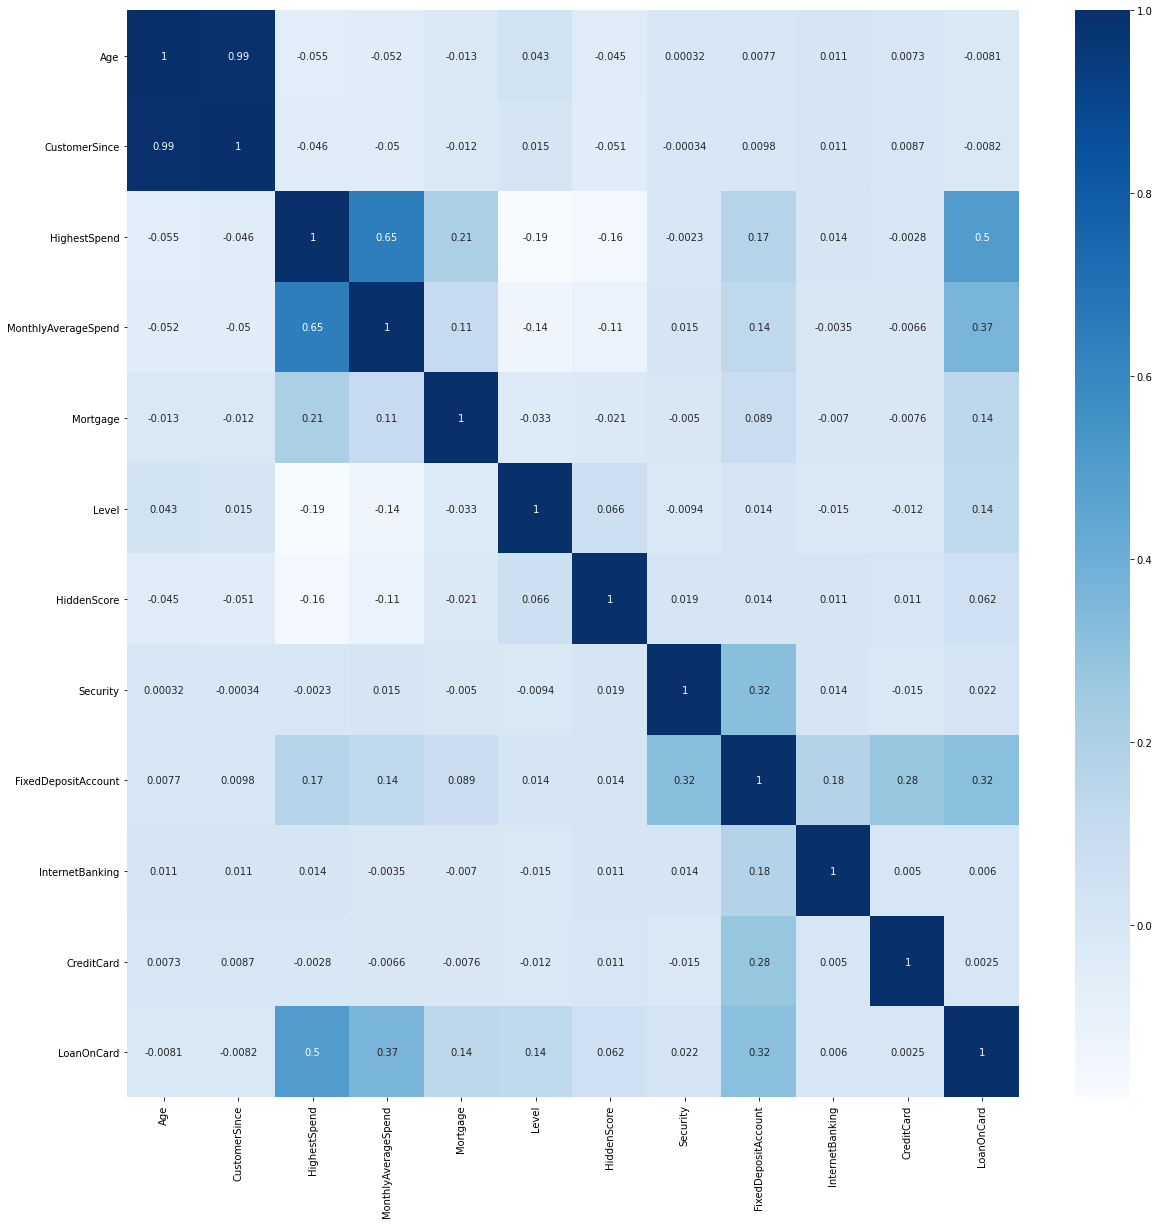

In [337]:
#plotting the correlation 
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(Part2_df.corr(),ax=ax,annot=True,cmap='Blues')

1. Customer since & Age are highly correlated. (obvious)
2. Age is negatively correlated with Highspend, AvgSpend,HiddenScore,LoanOnCard. So aged people are just depositers.
3. CustomerSince is same as Age. So customer who have long association with bank is liability. 
4. HighestApend vs MonthlyAvgSpend, LoanonCard is +ve. So who spend more are the borrowers(asset customers).
5. MonthlyAvgSpend is also same as HighestSpend.
6. FixedDepositeAcc vs Security, LoanOnCard is more +ve. So people with FixedDepositeAcc are asset customers.
7. Mortage vs Highspend, AvgSpend, LoanonCard is +ve. So borrowers.
8. HighSpend, AvgSpend is negatively associated with Level, HiddenScore.
9. LoanOnCard is +ve vs all except Age, CustomerSince. So Age is key factor that lowering borrowers percentage.And LoanOncard vs HighestSpend,AvgSpend is more +ve. So these 2 are key factors that improving asset customers %.

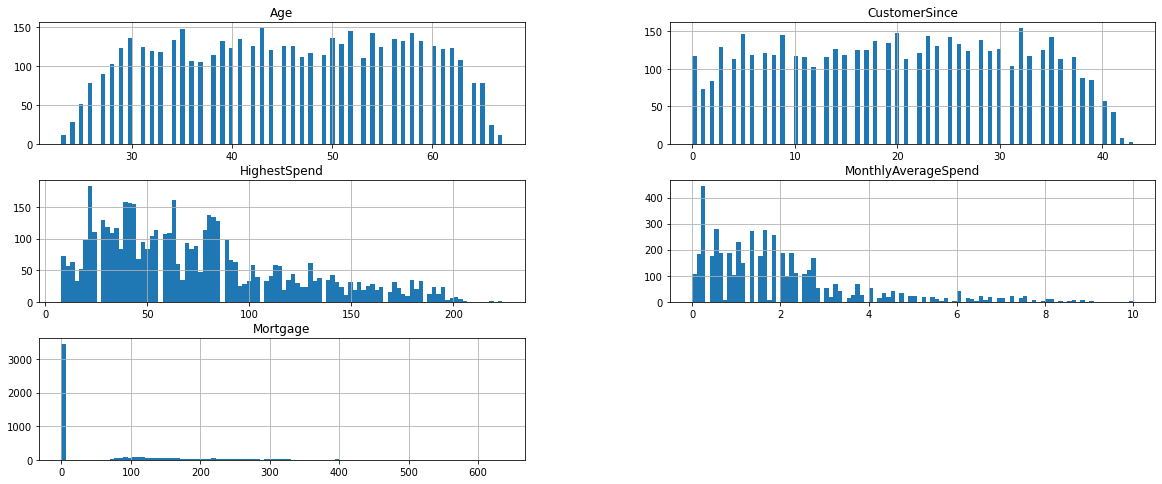

In [138]:
columns = list(Part2_df)[0:-7] # Excluding categorical columns
Part2_df[columns].hist(stacked=False, bins=100, figsize=(20,40), layout=(14,2)); 

- Age is looks like normal distribution
- HighestSpend, MonthlyAvgSpend is right skewed
- Customers with no mortage is high in number

In [338]:
Part2_df.skew()

Age                   -0.030794
CustomerSince         -0.018857
HighestSpend           0.839524
MonthlyAverageSpend    1.596001
Mortgage               2.102030
Level                  0.227298
HiddenScore            0.156413
Security               2.587962
FixedDepositAccount    3.682770
InternetBanking       -0.396433
CreditCard             0.902595
LoanOnCard             2.736088
dtype: float64

1. FixedDepositAccount has more +ve skewness (right)
2. Only Age, CustomerSince, InternetBanking is negative skewed. (left)
3. LoanOnCard, Security, Mortage, AvgSpend are having bettwe +ve skewness too (right)

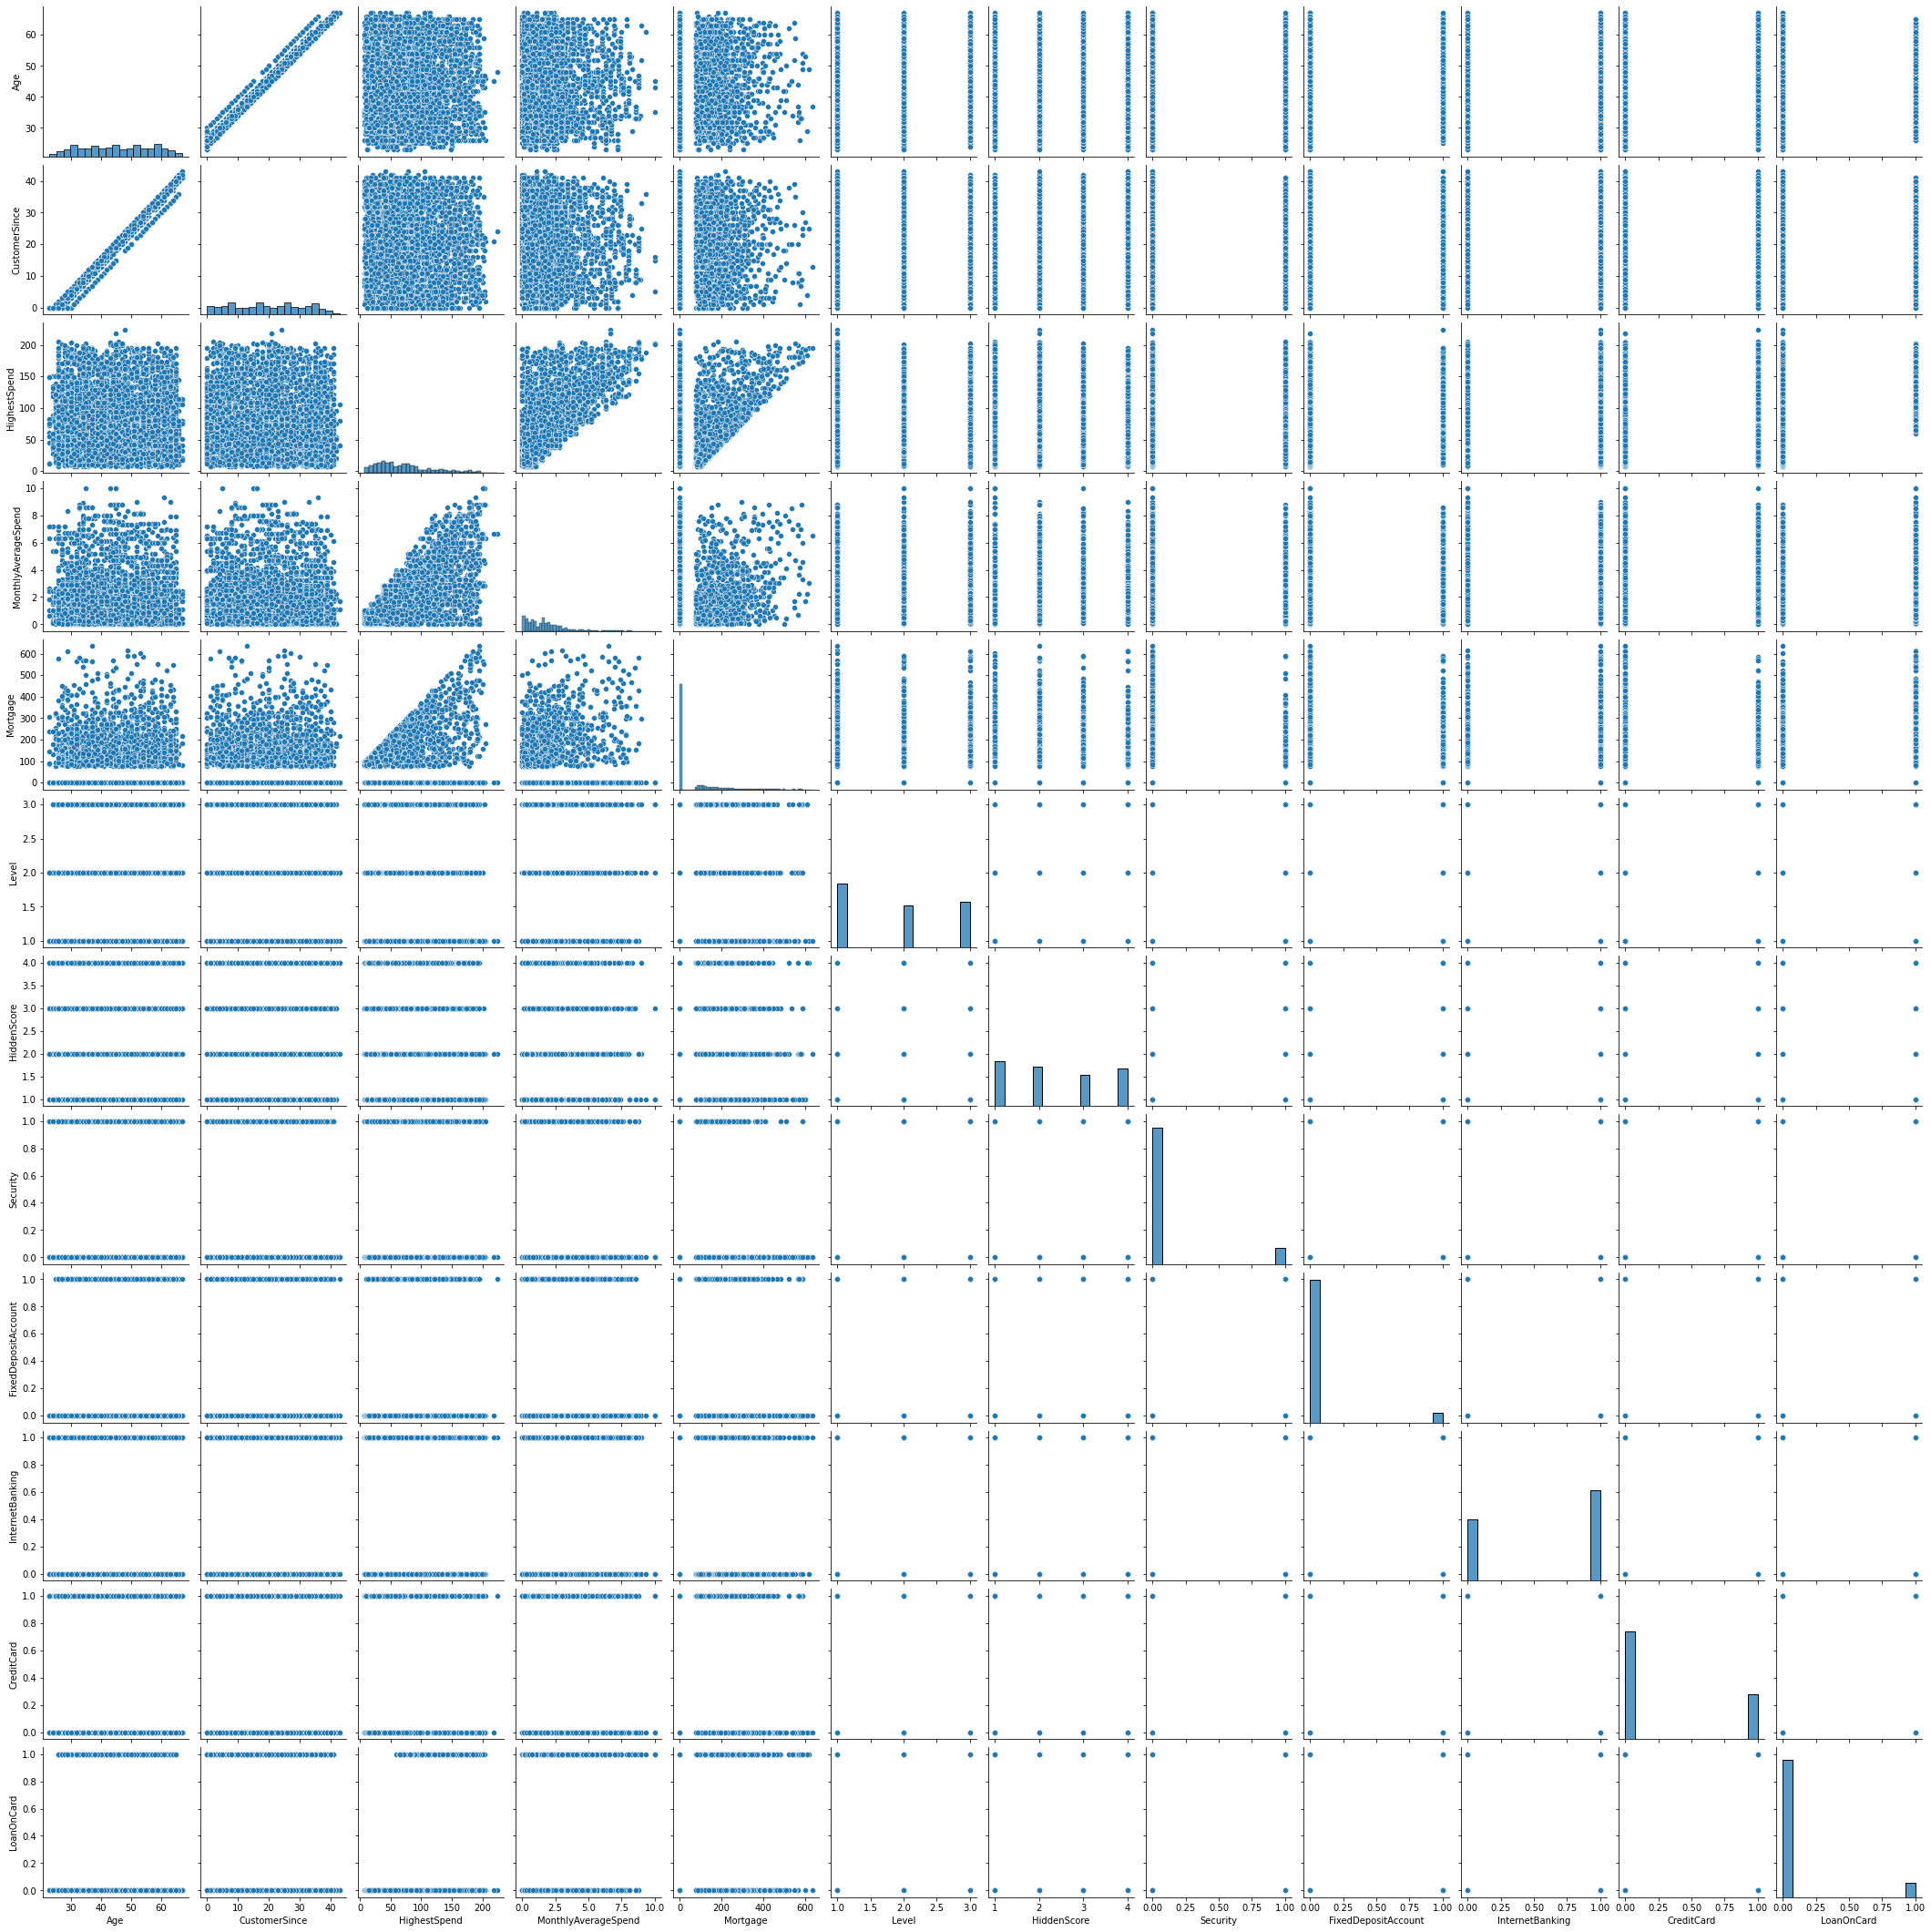

In [140]:
sns.pairplot(Part2_df)

1. Age & CustomerSince has linear relationship.
2. Internetbanking class 1 has more observation than 0.
3. LoanOnCard highly imbalanced.

# `Target Variable`

### From Problem statement - "The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests."

So our aim is to see the possibilites of giving more loans. So ``LoanOnCard`` will be our target variable. 

In [339]:
#Changing the dataype of LoanOnCard to Class
Part2_df['LoanOnCard']=Part2_df['LoanOnCard'].astype('object')

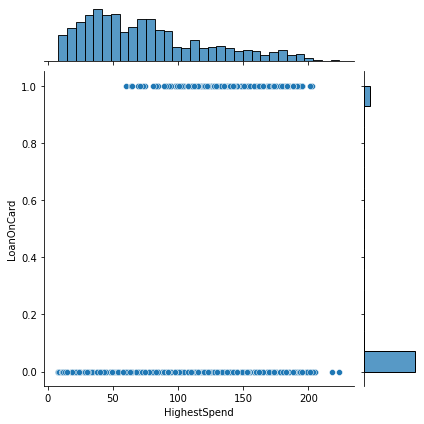

In [219]:
sns.jointplot(data=Part2_df, x ='HighestSpend',y='LoanOnCard')

People with lowest spend are less likely to avail loans

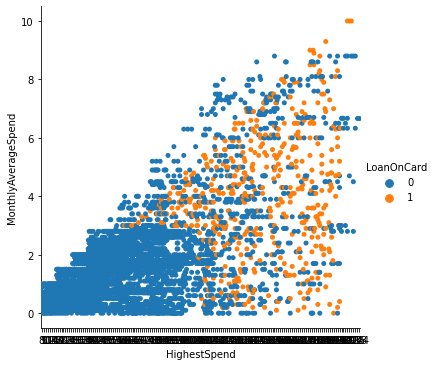

In [144]:
#sns.pairplot(Part2_df[['HighestSpend','LoanOnCard','MonthlyAverageSpend']])
sns.catplot(x='HighestSpend', y='MonthlyAverageSpend', hue='LoanOnCard', data = Part2_df, kind='swarm')

Customers with lower MonthlyAvgSpend & HighestSpend are bluw(no loan)

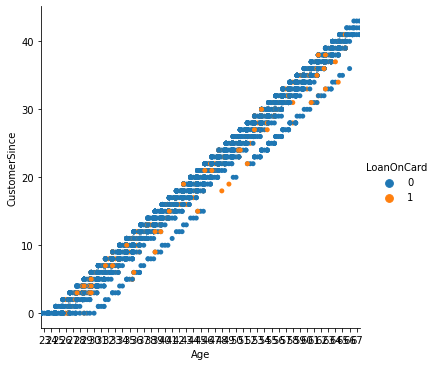

In [145]:
sns.catplot(x='Age', y='CustomerSince', hue='LoanOnCard', data = Part2_df, kind='swarm')

- Due to high imbalance between Loan observations couldn't fit well into Age/CustomerSince plots.
- Customers with lower Age is more likely to avail loan.

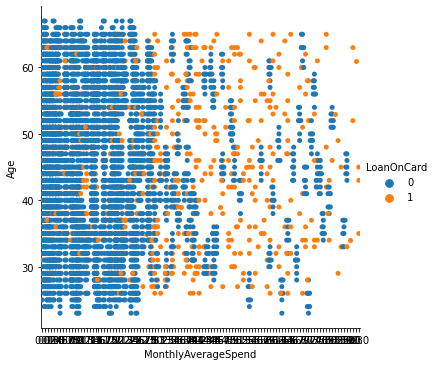

In [146]:
sns.catplot(y='Age', x='MonthlyAverageSpend', hue='LoanOnCard', data = Part2_df, kind='swarm')

- Customers with age aprox. 25-65 availed loan
- Customers with more MonthlyAvgSpend availed loan

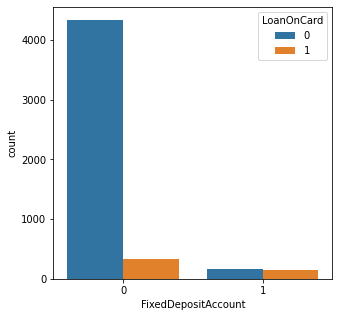

In [147]:
plt.figure(figsize=(5,5))
sns.countplot(x='FixedDepositAccount', hue='LoanOnCard', data=Part2_df);

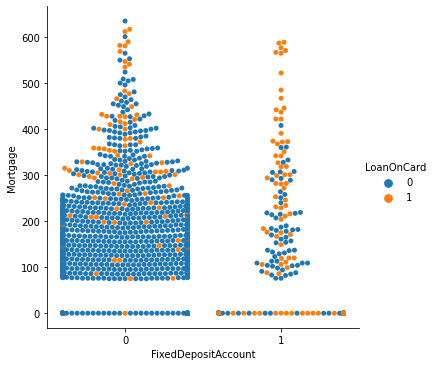

In [148]:
sns.catplot(x='FixedDepositAccount', y='Mortgage', hue='LoanOnCard', data = Part2_df, kind='swarm')

- With FixedDepositAccount are asset customers
- Without FixedDepositAccount are liable
- With less mortage & fixeddepositaccount are asset
- With less mortage & without fixeddepositaccount are liable

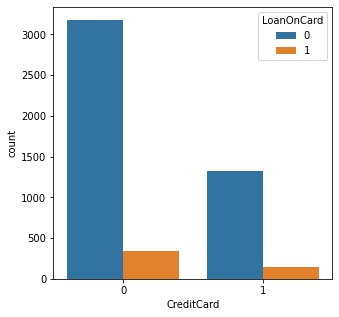

In [149]:
plt.figure(figsize=(5,5))
sns.countplot(x='CreditCard', hue='LoanOnCard', data=Part2_df);

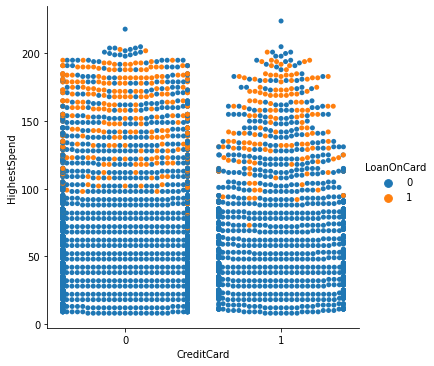

In [150]:
sns.catplot(y='HighestSpend', x='CreditCard', hue='LoanOnCard', data = Part2_df, kind='swarm')

- Customers with ot withour creditcard has less impact on Loans
- Customers WITHOUT Creditcard also availed LoanOncard (So ``LoanOnCARD``- isn't based on creditcard)
- Customers with high highestspend taken more loans

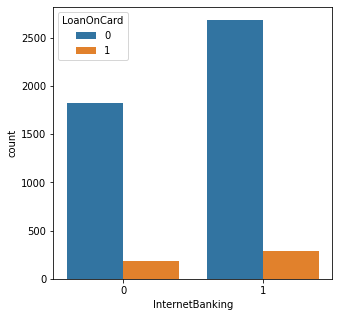

In [151]:
plt.figure(figsize=(5,5))
sns.countplot(x='InternetBanking', hue='LoanOnCard', data=Part2_df);

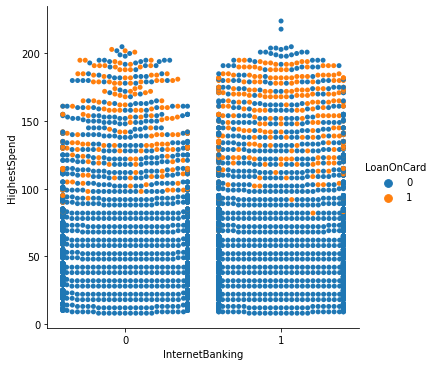

In [152]:
sns.catplot(y='HighestSpend', x='InternetBanking', hue='LoanOnCard', data = Part2_df, kind='swarm')

- Customers with InternetBanking are high liable than without Internetbanking.

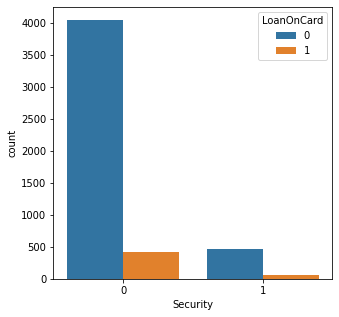

In [153]:
plt.figure(figsize=(5,5))
sns.countplot(x='Security', hue='LoanOnCard', data=Part2_df);

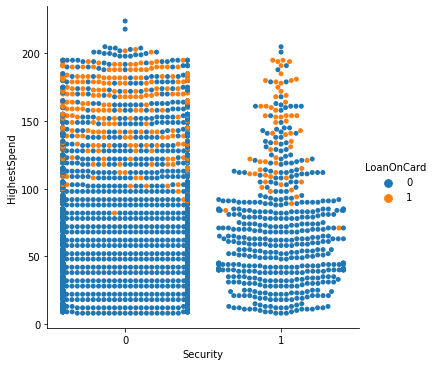

In [154]:
sns.catplot(y='HighestSpend', x='Security', hue='LoanOnCard', data = Part2_df, kind='swarm')

- Customers with Security availed loan more than without Security

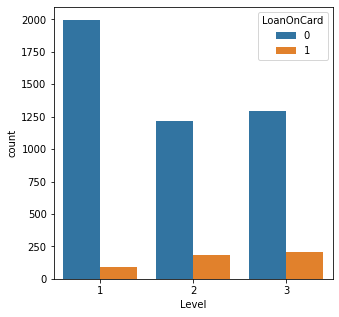

In [155]:
plt.figure(figsize=(5,5))
sns.countplot(x='Level', hue='LoanOnCard', data=Part2_df);

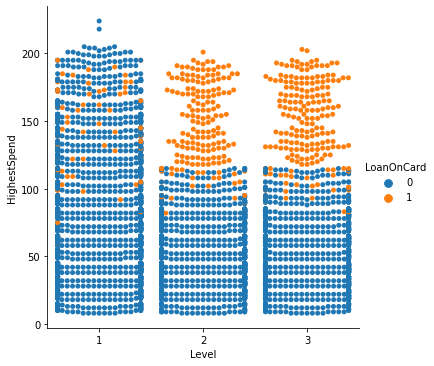

In [156]:
sns.catplot(y='HighestSpend', x='Level', hue='LoanOnCard', data = Part2_df, kind='swarm')

 - People at Level 2 or 3, have highspending has availed loans.

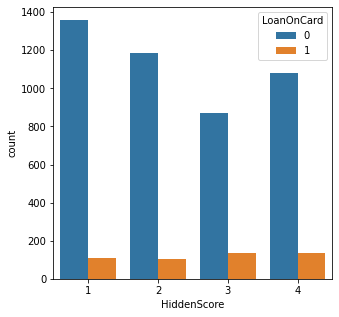

In [157]:
plt.figure(figsize=(5,5))
sns.countplot(x='HiddenScore', hue='LoanOnCard', data=Part2_df);

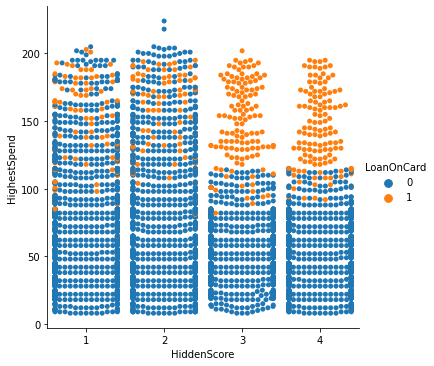

In [158]:
sns.catplot(y='HighestSpend', x='HiddenScore', hue='LoanOnCard', data = Part2_df, kind='swarm')

- more customers with 3 or 4 hiddenscore has availed loans

<AxesSubplot:>

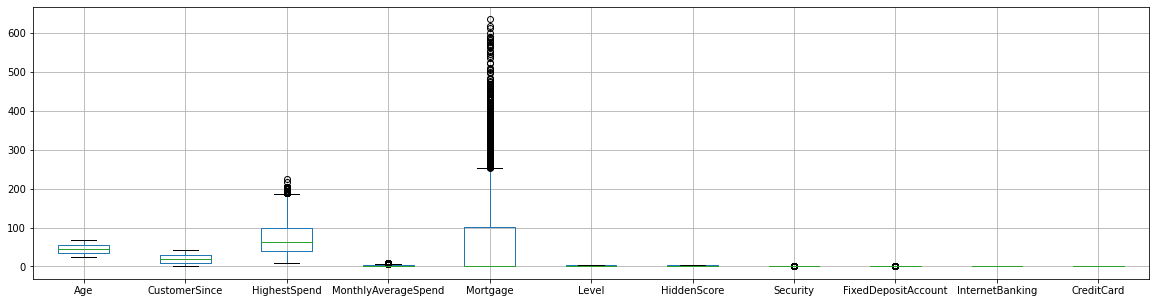

In [340]:
plt.figure(figsize=(20,5))
Part2_df.boxplot()

- Mortage has high outliers
- HighestSpend, AvgSpend, Security, FixedDesposite has outliers too.
- Age, CustomerSince has squareboxes (approx.)

## `4. Data pre-processing:`
##### • Segregate predictors vs target attributes
##### • Check for target balancing and fix it if found imbalanced.
##### • Perform train-test split.


- LoanonCard will be our target variable
- ID, ZipCode has no affect, so ignored

In [341]:
Part2_df['LoanOnCard'].value_counts()

0    4500
1     480
Name: LoanOnCard, dtype: int64

#### Target is highly imbalanced ; 8% of data is class1 & 92% data is Class0
- Model may be baised towards Class0 then.
- Lets upsample the class1.

In [342]:
Part2_df_Loan1=Part2_df[Part2_df['LoanOnCard'] == 1]
print("Before Upsampling the Class1 shape: ",Part2_df_Loan1.shape)

#Upsampling
Part2_df_Loan1_upsample = resample(Part2_df_Loan1,n_samples=4500)
print("After Upsampling the Class1 shape: ",Part2_df_Loan1_upsample.shape)

#Merging into main dataset
Part2_df = pd.concat([Part2_df[Part2_df['LoanOnCard']== 0],Part2_df_Loan1_upsample])
Part2_df['LoanOnCard'].value_counts()

Before Upsampling the Class1 shape:  (480, 12)
After Upsampling the Class1 shape:  (4500, 12)


0    4500
1    4500
Name: LoanOnCard, dtype: int64

In [344]:
#Changing Class to Int to fit into ML model
Part2_df['LoanOnCard']=Part2_df['LoanOnCard'].astype('int')

X = Part2_df.drop('LoanOnCard',axis=1)     # Predictor feature columns
Y = Part2_df['LoanOnCard']   # Predicted class

#spliting 70% train, 30% test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

#Sample data of train.test
print(x_train.sample(3))
print(x_test.sample(3))
#Shape of the datasets
Part2_df.shape, X.shape, Y.shape

      Age  CustomerSince  HighestSpend  MonthlyAverageSpend  Mortgage  Level  \
3116   36             10            21                  0.1         0      2   
1784   54             29           119                  2.0         0      1   
4838   56             30            44                  2.5         0      1   

      HiddenScore  Security  FixedDepositAccount  InternetBanking  CreditCard  
3116            3         0                    0                0           1  
1784            3         1                    1                0           0  
4838            4         0                    0                0           1  
      Age  CustomerSince  HighestSpend  MonthlyAverageSpend  Mortgage  Level  \
4675   35             11            32                 1.33       137      1   
366    50             24            35                 0.30         0      3   
4354   40             16           140                 5.60         0      1   

      HiddenScore  Security  FixedDepo

((9000, 12), (9000, 11), (9000,))

In [349]:
#Shapes of each split (cross-verify)
x_train.shape,  y_train.shape, x_test.shape, y_test.shape

((6300, 11), (6300,), (2700, 11), (2700,))

In [350]:
#Verifying the split data%
print("{0:0.2f}% data is in training set".format((len(x_train)/len(Part2_df.index)) * 100))
print("{0:0.2f}% data is in testing set".format((len(x_test)/len(Part2_df.index)) * 100))

70.00% data is in training set
30.00% data is in testing set


#### Upsampled; and have proper proportions of train,test data. 

## `5. Model training, testing and tuning:`
###### • Design and train a Logistic regression and Naive Bayes classifiers.
###### • Display the classification accuracies for train and test data.
###### • Display and explain the classification report in detail.
###### • Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model.


## ` Logistic Regression`

In [351]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Fit the model on train
LR = LogisticRegression(random_state=0)
LR.fit(x_train, y_train)
#predict on test
y_predict = LR.predict(x_test)


coef_df = pd.DataFrame(LR.coef_)
coef_df['intercept'] = LR.intercept_
print(coef_df)

          0         1         2         3         4        5         6  \
0 -0.361179  0.350282  0.049641  0.317948 -0.000111  1.19559  0.401661   

          7         8         9        10  intercept  
0  0.106377  1.514546 -0.293348 -0.308079  -0.157655  


In [352]:
#Score
LR_score = LR.score(x_test, y_test)
print("Logistic Regression Model Score:",(LR_score*100).round(decimals=4),"%")

Logistic Regression Model Score: 88.2222 %


<AxesSubplot:>

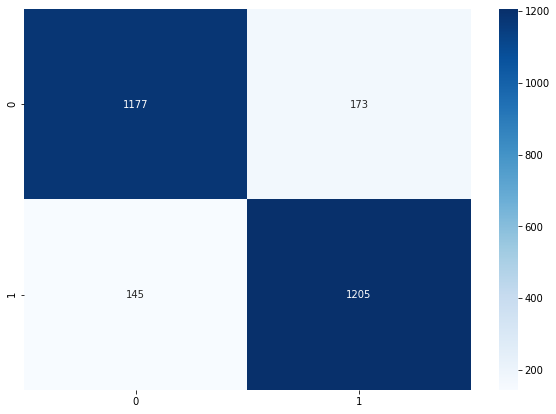

In [353]:
conf_mat = confusion_matrix(y_test, y_predict)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

##### Actual 0 - TN: 1177; FP: 173 (Total: 1350)
##### Actual 1 - FN: 145; TP: 1206 (Total: 1350)

Our model has predicted well & missclassified is less. So the accuracy is better.


In [354]:
#Classification Report:
clf_report = classification_report(y_test,y_predict)
print(clf_report)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1350
           1       0.87      0.89      0.88      1350

    accuracy                           0.88      2700
   macro avg       0.88      0.88      0.88      2700
weighted avg       0.88      0.88      0.88      2700



###### Precision = TP/(TP + FP) (Correct prediction rate)
- class 0 is predicted slightly more
- overall 88% is good score

######  Recall = TP/(TP+FN)
- class 1 is predicted better
- overall 88% is good score


######  F1 Score = 2*(Recall * Precision) / (Recall + Precision)
- 88% is much better F1-score

######  Support = no.of actual occurrences of the class in the dataset.
- As we upsamples, we have all equal sizes of each class types.


# `Naive Bayes`

In [355]:
NB = GaussianNB()
NB.fit(x_train, y_train)
Y_pred = NB.predict(x_test)
#normalize = True
NBScore = accuracy_score(y_test, Y_pred)
print("Gaussian Naive Bayes Model Score:",(NBScore.round(decimals=4)*100),"%")

Gaussian Naive Bayes Model Score: 83.3 %


<AxesSubplot:>

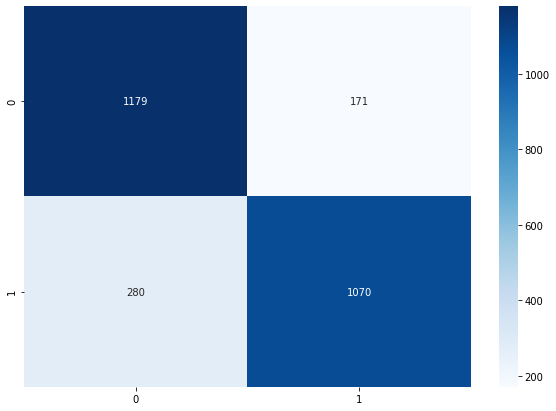

In [356]:
# Display confusion matrix
conf_mat = confusion_matrix(y_test, Y_pred)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

##### Actual 0 - TN: 1178; FP: 172 (Total: 1350)
##### Actual 1 - FN: 293; TP: 1057 (Total: 1350)

- Compared to LR model (1226), Class1 is predicted incorrectly by NB model(1057)
- Prediction of Class0 is almost same as LR model.(LR-1188, NB-1178)

- The accuracy 82.7% is not best model. 

In [357]:
#Classification Report:
clf_report = classification_report(y_test,Y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1350
           1       0.86      0.79      0.83      1350

    accuracy                           0.83      2700
   macro avg       0.84      0.83      0.83      2700
weighted avg       0.84      0.83      0.83      2700



###### Precision = TP/(TP + FP) (Correct prediction rate)
- class 1 is predicted better than class0
- overall 84% is not bad & not best also.

######  Recall = TP/(TP+FN)
- class 0 is predicted better
- overall 83% isn't best score


######  F1 Score = 2*(Recall * Precision) / (Recall + Precision)
- Class0 is slightly better predicted
- 83% isn't much better F1-score

######  Support = no.of actual occurrences of the class in the dataset.
- As we upsamples, we have all equal sizes of each class types.

## `After Scaling`

In [358]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=scaler.fit_transform(Part2_df.drop('LoanOnCard',axis=1))
scaled_df=pd.DataFrame(scaled_df)
scaled_df.columns= Part2_df.drop('LoanOnCard',axis=1).columns

X=scaled_df
y=Part2_df['LoanOnCard']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [359]:
NB = GaussianNB()
NB.fit(x_train, y_train)
Y_pred = NB.predict(x_test)
NBScore = accuracy_score(y_test, Y_pred, normalize = True)
print("Gaussian Naive Bayes Model Score:",(NBScore.round(decimals=4)*100),"%")
# Fit the model on train
LR = LogisticRegression(random_state=0)
LR.fit(x_train, y_train)
#predict on test
y_predict = LR.predict(x_test)

#Score
LR_score = LR.score(x_test, y_test)
print("Logistic Regression Model Score:",(LR_score*100).round(decimals=4),"%")

Gaussian Naive Bayes Model Score: 83.3 %
Logistic Regression Model Score: 89.1111 %


#### Even after scaling, the score isn't improved much in both models. The score is almost same (slightly better in LR model)

## LR Model:
- Before scaling: 88.22%
- After scaling: 89.11%

## NB Model:
- Before scaling: 83.3%
- After scaling: 83.3%

- There is no difference in NB model even after scaling where as LR model got 1% better

# `All Classification Methods`

In [360]:
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=10)
GN_model=GaussianNB()
svc_model_linear = SVC(kernel='linear',C=1,gamma=.6)
svc_model_rbf = SVC(kernel='rbf',degree=2,C=.009)
svc_model_poly  = SVC(kernel='poly',degree=2,gamma=0.1,C=.01)

LR: 0.888111 (0.006705)
KNN: 0.911778 (0.012912)
NB: 0.827667 (0.014719)
SVM-linear: 0.891333 (0.008830)
SVM-poly: 0.954778 (0.006705)
SVM-rbf: 0.864667 (0.010059)


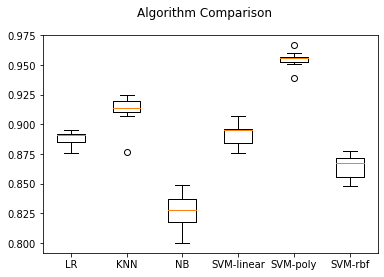

In [361]:
# prepare models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear', svc_model_linear))
models.append(('SVM-poly', svc_model_poly))
models.append(('SVM-rbf', svc_model_rbf))
#Reassigning the variables
X = Part2_df.drop('LoanOnCard',axis=1)     # Predictor feature columns
Y = Part2_df['LoanOnCard']   # Predicted class
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=1,shuffle=True)
    cv_results = model_selection.cross_val_score(model,  X,Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

 - LR & KNN models seems to be good for this dataset.
 - SVM with polynomial kernal is very accurate. Since we did upsampling, there could be overfitting chance too.
 - NB has very poor score compared to others.

## `6. Conclusion and improvisation:`
    
###### • Write your conclusion on the results.
###### • Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the bank to perform a better data analysis in future.


## `Conclusions`

- Models nearly performing around 85%, which is good.
- FixedDepositeAccount feature has very high impact on Class(LoanOnCard)
- CustomerSince, MonthlyAvgSpend, HighestSpend,Mortage,Secuity has good relationship with Class
- Higher Level score seems to be deciding factor too.
- InternetBanking & Creditcard has negative impact on class outcome
- Standardization of data didn't improve accuracy much
- Class 1 is misclassified much. Overall misclassifications are less.
- LR model is better for this data, compares to NB model.
- To improve conversion rate, we can target the mid range aged people with more MonthlyAvgSpend & not holding FixedDepositAccount
- Loan has positive correlation with FixeddeposteAccount. In real world, this is more of buiness type loans.
- Customers with personal FD account are less likely to avail any loans.


## `Suggestions`

- Original dataset has imbalanced target variable.
- Dataset size is good enough to build ML model
- It was missing few important keyfactors before giving loans.
    #Purpose of the loan is missing
    #Source of income like salary..etc missing
    #Credit history of the customer
    #Profession of the customer (salaried/business)
    #employement experience
    #previous loans payback score(if any)
    #Any other active loans exists?
    #Dependent details of the customer (family-married/unmarried)
- LoanOnCard column name is misleading. Dataset has only 1 column i.e CreditCard. But there are rows with loan-1, creditcard-0
- Dataset has very very few null values, which is good.
- Most of the info seems to be coming internally databases. So can be collected quickly.


## `The End of the project notebook` ##